In [3]:
#Exercice 1 
import pandas as pd
NON_VAR = ['WIFE_AGE','WIFE_EDU','HUSB_EDU','NUM_OF_CHILD',\
           'WIFE_RELI','WIFE_WORK','HUSB_OCUP','STA_OF_LIV','MEDIA_EXP','CONTRACEPTIVE']
donnee = pd.read_csv("/users/brahda15/Documents/cmc.data.txt",sep=',',header=None,names=NON_VAR)

In [4]:
donnee['CONTRACEPTIVE'].value_counts()

1    629
3    511
2    333
Name: CONTRACEPTIVE, dtype: int64

In [5]:
donnee.columns

Index(['WIFE_AGE', 'WIFE_EDU', 'HUSB_EDU', 'NUM_OF_CHILD', 'WIFE_RELI',
       'WIFE_WORK', 'HUSB_OCUP', 'STA_OF_LIV', 'MEDIA_EXP', 'CONTRACEPTIVE'],
      dtype='object')

In [6]:
features = [o for o in donnee.columns if o !='CONTRACEPTIVE']
X = donnee[features]
Y = donnee['CONTRACEPTIVE']

In [7]:
import numpy as np
Y_red = np.where(Y==1,0,1)

In [8]:
import pandas as pd
a_dummies = ['WIFE_EDU','HUSB_EDU','HUSB_OCUP','STA_OF_LIV']

for var in a_dummies:
    X.loc[:,var] = X.loc[:,var].copy().astype(str)

X_dum = pd.get_dummies(X[a_dummies])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
A_garder = [var for var in list(X) if var not in a_dummies]
X = X[A_garder]

X = pd.concat([X,X_dum],axis=1)

In [11]:
#1/Division en échantillon d'apprentissage et de test
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y_red,test_size=0.33,random_state=1997)


In [12]:
#2/Modèle de régression logistique
from sklearn.linear_model import LogisticRegression
logit1  = LogisticRegression(penalty='l2',random_state=1997, solver='lbfgs',C=1/2,max_iter=1000, multi_class='auto')

In [13]:
#3/Entrainement du modèle avec les données tests
logit1.fit(X_train,Y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=1997, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
#4/Prévision de Y_pred produite avec les X_tests et le modèle logit1
Y_pred = logit1.predict(X_test)

In [16]:
#5/Calcul de la précision du modèle
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.6776180698151951

In [17]:
#6/Calcul de la matrice de confusion du modèle logit1
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[ 99, 113],
       [ 44, 231]])

In [18]:
#7/Prévision en probabilité du modèle logit1
Y_pred_prob = logit1.predict_proba(X_test)

In [19]:
#8/Calcul du score AUC du modèle logit1
from sklearn.metrics import roc_auc_score, auc
roc_auc_score(Y_test,logit1.predict_proba(X_test)[:,1])

0.7177358490566038

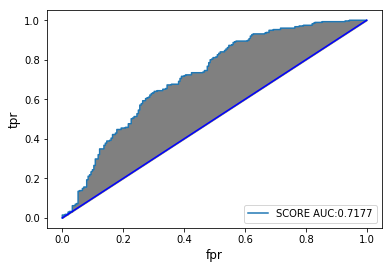

In [22]:
#9/Courbe ROC du modèle logit1
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Y_test,logit1.predict_proba(X_test)[:,1])
auc(fpr,tpr)

import numpy as np

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label = "SCORE AUC:"+str(np.round(auc(fpr,tpr),4)))
plt.plot([0,1],[0,1],color='blue')
plt.ylabel("tpr",fontsize='large')
plt.xlabel("fpr",fontsize='large')
plt.fill_between(fpr, fpr, tpr,color='grey')
plt.legend(loc=4)
plt.show()

In [23]:
#Exercice 2

#1/Division en échantillon d'apprentissage et de test
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y_red,test_size=0.33,random_state=1998)

In [24]:
#2/Création d'un modèle d'arbre de décision
from sklearn.tree import DecisionTreeClassifier
arbre = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=2)

In [25]:
#3/Entrainement du modèle
arbre.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
#4/Calcul des prédictions
Y_pred = arbre.predict(X_test)

In [27]:
#5/Précision du modèle
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.6817248459958932

In [31]:
#6/Création d'un autre modèle d'arbre de décision
arbrebis = DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_split=4,min_samples_leaf=3)
arbrebis.fit(X_train,Y_train)
Y_pred_bis = arbrebis.predict(X_test)

In [32]:
#7/Calcul de la précision du nouveau modèle
accuracy_score(Y_test,Y_pred_bis)

0.6940451745379876

In [33]:
#8/Prévision en probabilité du modèle arbrebis
Y_pred_bis_prob = arbrebis.predict_proba(X_test)

In [34]:
#9/Calcul du score AUC du modèle arbrebis1
roc_auc_score(Y_test,arbrebis.predict_proba(X_test)[:,1])

0.70710557043753

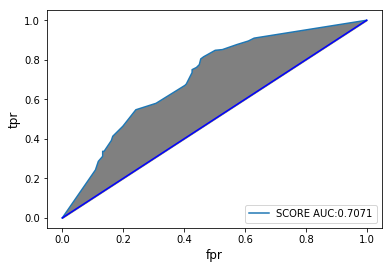

In [35]:
#10/Courbe ROC du modèle arbrebis
fpr, tpr, threshold = roc_curve(Y_test,arbrebis.predict_proba(X_test)[:,1])
auc(fpr,tpr)

plt.plot(fpr,tpr,label = "SCORE AUC:"+str(np.round(auc(fpr,tpr),4)))
plt.plot([0,1],[0,1],color='blue')
plt.ylabel("tpr",fontsize='large')
plt.xlabel("fpr",fontsize='large')
plt.fill_between(fpr, fpr, tpr,color='grey')
plt.legend(loc=4)
plt.show()

from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(n_estimators=300, criterion='gini',\
                             random_state=1998,max_depth=7, min_samples_split=3,min_samples_leaf=2)
rdf.fit(X_train,Y_train)



<function matplotlib.pyplot.show(*args, **kw)>

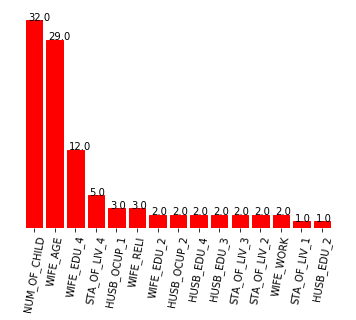

In [36]:
#11/Illustration de l'importance des features
NON_FEATURES = X_train.columns

import numpy as np
IMPORTANCE_FEATURES = 100*np.round(arbrebis.feature_importances_,2)
loca = np.arange(len(IMPORTANCE_FEATURES))

index = np.argsort(IMPORTANCE_FEATURES)[::-1]

#on ordonne 
IMPORTANCE_FEATURES = IMPORTANCE_FEATURES[index][0:15]
NON_FEATURES = NON_FEATURES[index][0:15]
loca  = loca[0:15]

import matplotlib.pyplot as plt
plt.bar(loca,IMPORTANCE_FEATURES,edgecolor='red',color='red')
plt.yticks([])
plt.xticks(loca,NON_FEATURES,color='black',rotation=80)
plt.box(False)
for i in range(0,len(NON_FEATURES)):
    plt.text(loca[i]-0.3,IMPORTANCE_FEATURES[i],str(np.round(IMPORTANCE_FEATURES[i],1)))
plt.show

In [40]:
#Exercice 3

#1/Création d'un modèle de forêts aléatoires
from sklearn.ensemble import RandomForestClassifier
randfo = RandomForestClassifier(n_estimators=300, criterion='gini',\
                             random_state=1998,max_depth=9, min_samples_split=3,min_samples_leaf=2,max_features=0.7)
randfo.fit(X_train,Y_train)
Y_pred_rdf = randfo.predict(X_test)

In [38]:
#2/ TODO


In [41]:
#3/Calcul de la précision
accuracy_score(Y_test,Y_pred_rdf)

0.7268993839835729

In [42]:
#4/Calcul du score AUC
roc_auc_score(Y_test,randfo.predict_proba(X_test)[:,1])

0.7696957208599492